In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into testing and training

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape
train_images[0,23,23]
train_labels[:10]

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

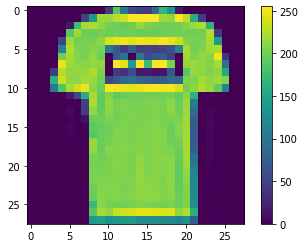

In [4]:
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
#Data preprocessing

train_images = train_images / 255.0

test_images = test_images / 255.0


In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4985 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3739 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3363 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3122 - accuracy: 0.8867
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2941 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2825 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2677 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2584 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2487 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.240

In [12]:
#evaluating the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3421 - accuracy: 0.8798
Test accuracy: 0.879800021648407


In [19]:
predictions = model.predict(test_images)

COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

In [26]:
#function to predict the class of the product 
def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]
  print('predicted label:', predicted_class)      #shows the predicted category of the fashion product

  show_image(image, class_names[correct_label], predicted_class)

In [27]:
#visualizing the selected fashion product
def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Expected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

Pick a number between 0 and 1000: 16
expected label: 2
predicted label: Pullover


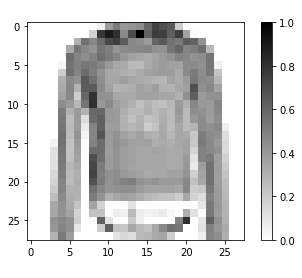

In [29]:
#choose any of the 1000 fashion products using the input console
def get_number():
  while True:
    num = input("Pick a number between 0 and 1000: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()        #lets the user input the fashion product serial number 
image = test_images[num]
label = test_labels[num]
print('expected label:',label)    #shows the expected category of the product (index starts from 0 in the class_names list)
predict(model, image, label)